# Linear Algebra

In [1]:
import numpy as np

water = np.loadtxt('water.txt')
water

array([[ 0.  ,  0.  ],
       [-0.82, -0.48],
       [ 0.82, -0.48]])

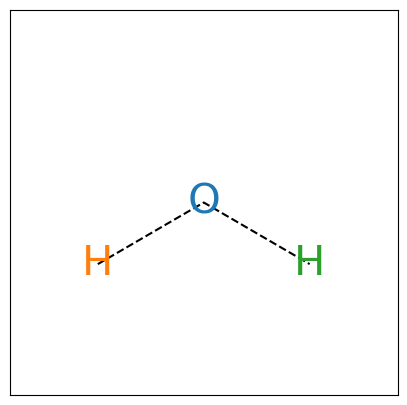

In [2]:
import visualisation

visualisation.show(water)

In [3]:
def rotation_matrix(theta):
    """
    Create a 2D rotation matrix for a given angle theta in radians.
    :param theta: Angle in radians.
    :return: 2x2 numpy array representing the rotation matrix.
    """
    matrix = np.array([[np.cos(theta), -np.sin(theta)],
                       [np.sin(theta), np.cos(theta)]])
    return matrix

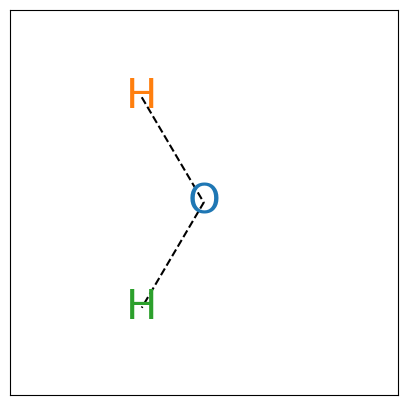

In [4]:
visualisation.show(water @ rotation_matrix(np.pi / 2))

# Probabilistic Analysis

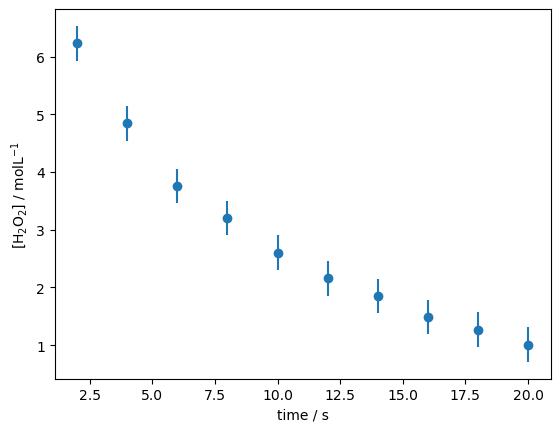

In [5]:
import matplotlib.pyplot as plt

data = np.loadtxt('first-order.txt')
plt.errorbar(data[0], data[1], data[2], ls='', marker='o')
plt.xlabel('time / s')
plt.ylabel('[H$_2$O$_2$] / molL$^{-1}$')
plt.show()

In [6]:
def firstorder(inital_concentration, k):
    """
    Calculate the concentration of a first-order reaction at a given time.
    :param inital_concentration: Initial concentration of the reactant.
    :param k: Rate constant of the reaction.
    :return: Concentration at time t.
    """
    return inital_concentration * np.exp(-k * data[0])

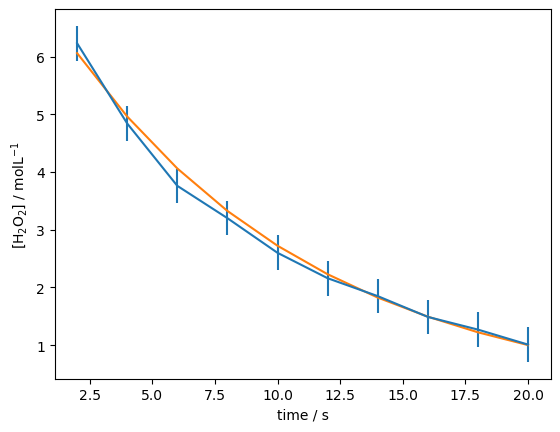

In [7]:
# An initial guess
plt.errorbar(data[0], data[1], data[2])
plt.plot(data[0], firstorder(7.4, 1e-1))
plt.xlabel('time / s')
plt.ylabel('[H$_2$O$_2$] / molL$^{-1}$')
plt.show()

In [8]:
from scipy.stats import multivariate_normal

mv = multivariate_normal(mean=data[1], cov=np.diag(data[2] ** 2))
mv.logpdf(firstorder(7.4, 1e-1))

1.8901620647141268

In [9]:
from scipy.optimize import minimize

def nll(parameters):
    """
    Calculate the negative log-likelihood for the first-order reaction model.
    :param parameters: List containing initial concentration and rate constant.
    :return: Negative log-likelihood value."""
    initial_concentration = parameters[0]
    k = parameters[1]
    return -mv.logpdf(firstorder(initial_concentration, k))

results = minimize(nll, x0=[7.4, 1e-1])

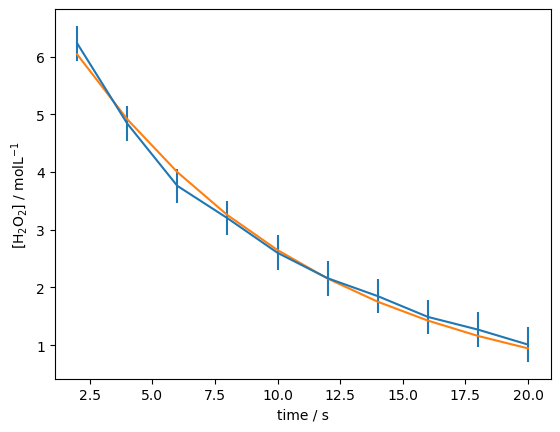

In [10]:
plt.errorbar(data[0], data[1], data[2])
plt.plot(data[0], firstorder(*results.x))
plt.xlabel('time / s')
plt.ylabel('[H$_2$O$_2$] / molL$^{-1}$')
plt.show()

In [11]:
results.x

array([7.42164402, 0.10308255])

# Clustering Analysis

In [12]:
from sklearn.cluster import KMeans

data = np.loadtxt('clustering.txt')
data.shape

(684, 3)

In [13]:
inertia = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

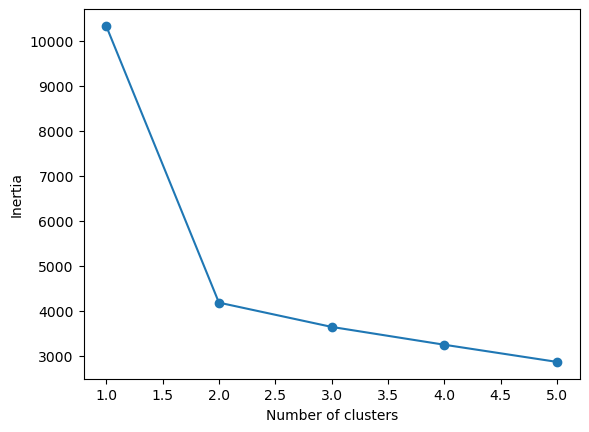

In [15]:
plt.plot(range(1, 6), inertia, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The optimal number of clusters is 2. 

# Dimensionality Reduction

In [18]:
import pandas as pd
from sklearn.decomposition import PCA

data = pd.read_csv('polymorph.csv')
data

,SpaceGroup,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10
0,P222,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,P222,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,P222,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,P222,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,P222,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,P222,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,P222,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,P222,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,P222,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [21]:
pca = PCA()
pca.fit(data.drop('SpaceGroup', axis=1))

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


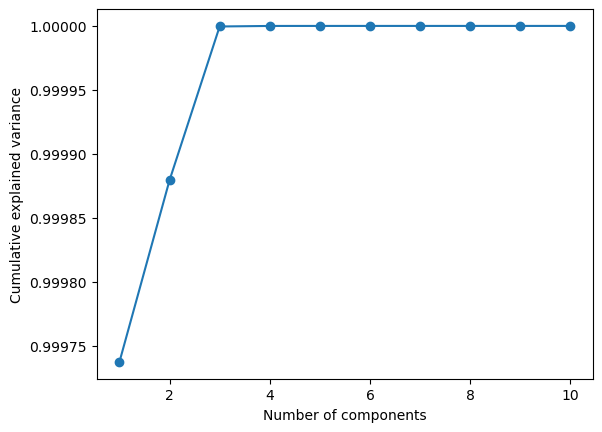

In [27]:
plt.plot(np.arange(1, 11), np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

The first two components explain nearly all of the variance. 